### Import Libraries 

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data analysis

In [9]:
# Making sure there are no nullvalues
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no null values in our dataset, Letus proceed with checking the balance of class labels

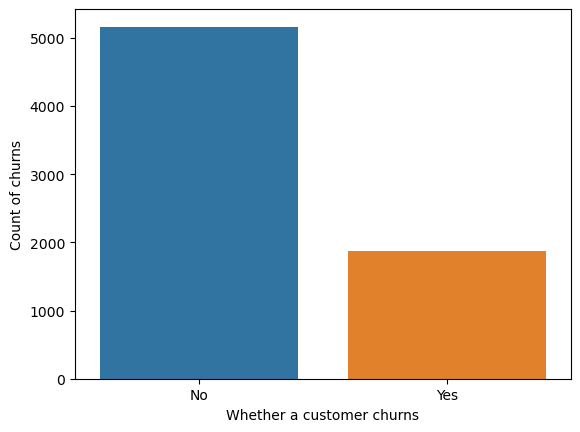

In [15]:
sns.countplot(data = df,x = "Churn")
plt.xlabel("Whether a customer churns")
plt.ylabel("Count of churns")
plt.show()

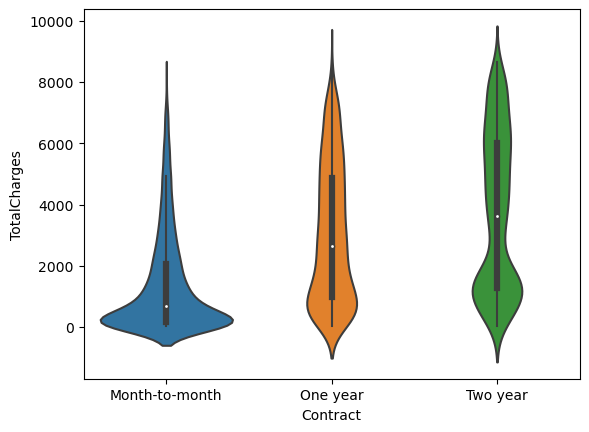

In [18]:
# This is an imbalanced dataset Let's explore the distribution of charges between customers who churns and who not.

## Violin Plot 

sns.violinplot(data = df, x = "Contract", y = "TotalCharges")
plt.show()

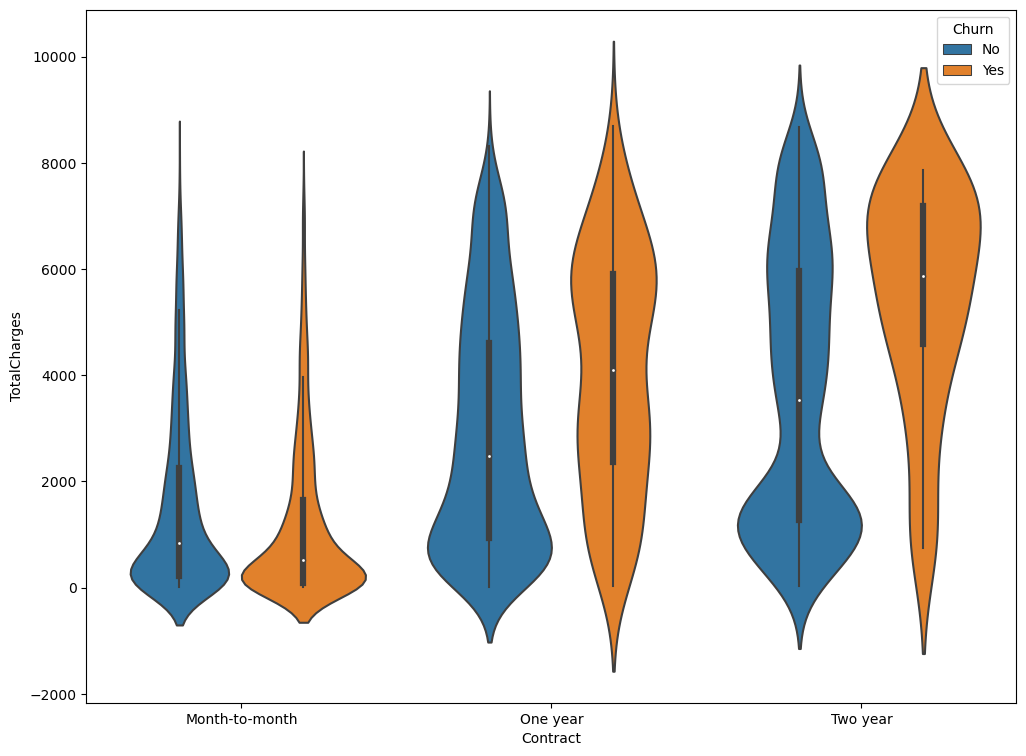

In [20]:
plt.figure(figsize = (12,9))
sns.violinplot(data = df, x = "Contract", y = "TotalCharges",hue = "Churn")
plt.show()

In [21]:
## Customers on Yearly contract and paying above Rs.6k as total charges tends to churn more.
## Correlation 

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

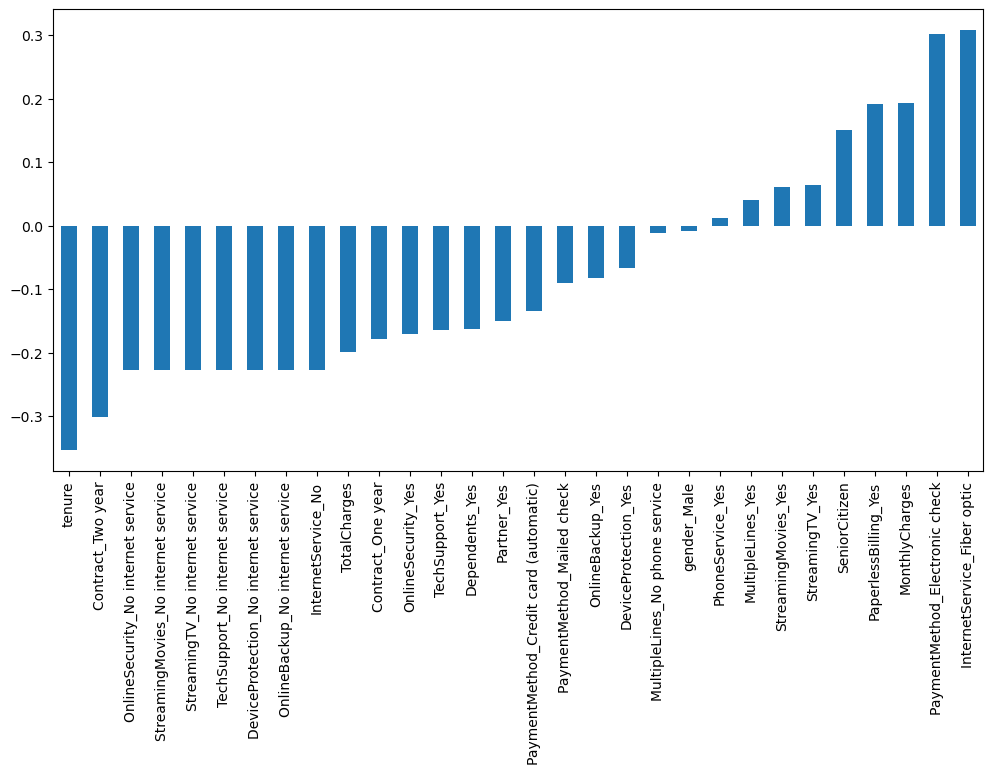

In [38]:
plt.figure(figsize = (12,6))
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 
       'Churn']],drop_first = True).corr()["Churn_Yes"].sort_values().iloc[:-1].plot(kind="bar")

Apparently Contract and Tenure affect the most weather a customer will churn or not 

In [36]:
df["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [37]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

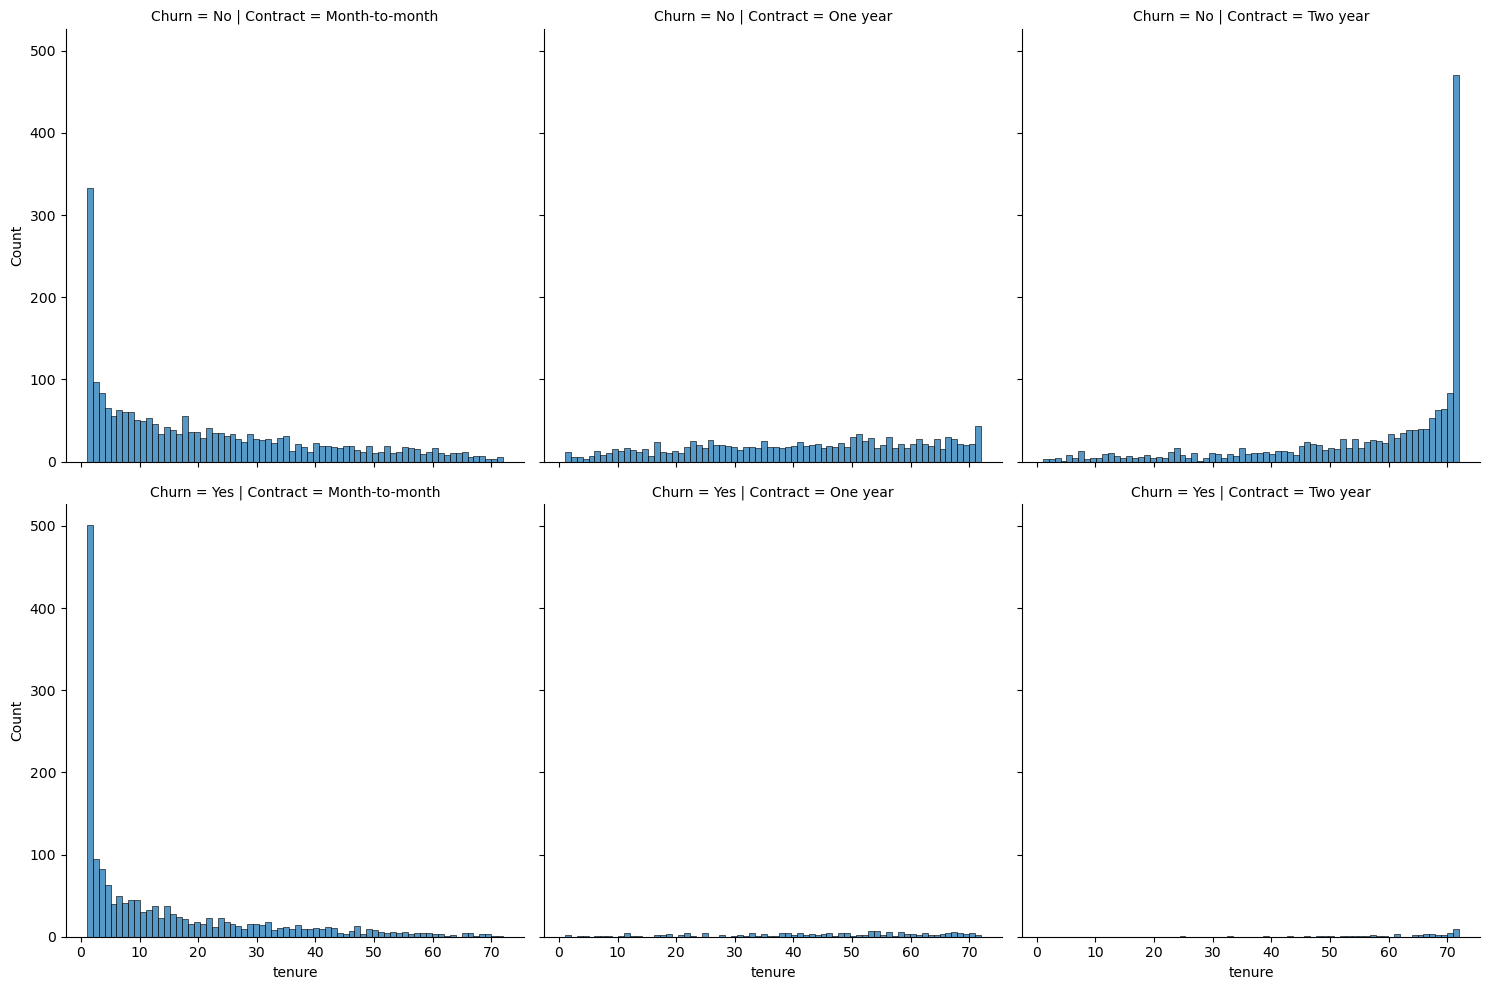

In [42]:
sns.displot(data = df,x = "tenure",bins = 70,row = "Churn",col = "Contract")

In [43]:
## Cohort Groups 
def cohort(tenure):
    if tenure <13:
        return "0-12 Months"
    elif tenure <25:
        return "12-24 Months"
    elif tenure <49:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [44]:
df["Tenure Cohort"] = df["tenure"].apply(cohort)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

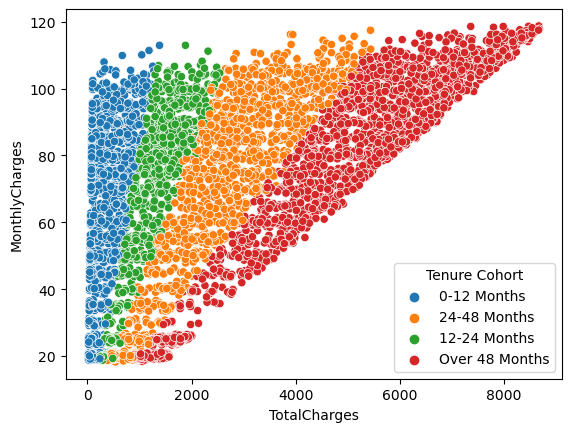

In [45]:
# Plot Monthly Charges Vs total charges colored by Tenure Cohort

sns.scatterplot(data = df,x = "TotalCharges",y = "MonthlyCharges",hue = "Tenure Cohort")

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

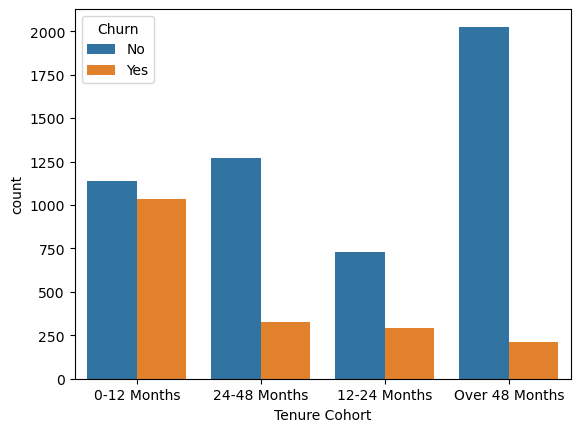

In [47]:
sns.countplot(data = df,x = "Tenure Cohort",hue = "Churn")

### Predictive Modeling

In [48]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [57]:
X = df.drop(["customerID","tenure","Churn"],axis = 1)
Y = df["Churn"]

In [58]:
X = pd.get_dummies(X,drop_first=True)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 101)

In [61]:
sdt = DecisionTreeClassifier()
sdt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [64]:
sdt_predict = sdt.predict(X_test)

In [65]:
print(classification_report(sdt_predict,Y_test))

              precision    recall  f1-score   support

          No       0.78      0.84      0.81       516
         Yes       0.46      0.36      0.40       188

    accuracy                           0.71       704
   macro avg       0.62      0.60      0.61       704
weighted avg       0.70      0.71      0.70       704



In [66]:
confusion_matrix(sdt_predict,Y_test)

array([[436,  80],
       [121,  67]], dtype=int64)

In [67]:
rf = RandomForestClassifier()

In [69]:
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(rf_pred,Y_test))

              precision    recall  f1-score   support

          No       0.88      0.86      0.87       570
         Yes       0.47      0.51      0.49       134

    accuracy                           0.80       704
   macro avg       0.68      0.69      0.68       704
weighted avg       0.80      0.80      0.80       704



In [70]:
confusion_matrix(rf_pred,Y_test)

array([[492,  78],
       [ 65,  69]], dtype=int64)

In [73]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
ada_pred = ada.predict(X_test)
print(classification_report(ada_pred,Y_test))

              precision    recall  f1-score   support

          No       0.90      0.88      0.89       571
         Yes       0.52      0.58      0.55       133

    accuracy                           0.82       704
   macro avg       0.71      0.73      0.72       704
weighted avg       0.83      0.82      0.82       704



In [75]:
log = LogisticRegression(max_iter =1000)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(rf_pred,Y_test))

              precision    recall  f1-score   support

          No       0.91      0.87      0.89       583
         Yes       0.49      0.60      0.54       121

    accuracy                           0.82       704
   macro avg       0.70      0.73      0.71       704
weighted avg       0.84      0.82      0.83       704



In [77]:
svm = SVC(class_weight = "balanced")
svm.fit(X_train,Y_train)
svm_pred = svm.predict(X_test)
print(classification_report(svm_pred,Y_test))

              precision    recall  f1-score   support

          No       0.73      0.85      0.78       475
         Yes       0.52      0.34      0.41       229

    accuracy                           0.68       704
   macro avg       0.63      0.59      0.60       704
weighted avg       0.66      0.68      0.66       704

